# Morris-Lecar Nullclines
Here we used explore equations from 
https://isn.ucsd.edu/courses/beng260/complab/week2/hw2_example.py

In [1]:
from numpy import tanh
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
C_m  =   1.0 # membrane capacitance, in uF/cm^2
g_Ca =   1.1 # maximum conducances, in mS/cm^2
g_K  =   2.0
g_L  =   0.5
E_Ca = 100.0 # Nernst reversal potentials, in mV
E_K  = -70.0
E_L  = -50.0

In [3]:
# Steady-state gating variables
def w_inf(V):
  return 0.5*(1 + tanh(V/30))

def m_inf(V):
  return 0.5*(1 + tanh((V+1)/15))

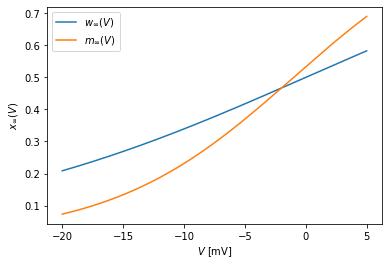

In [4]:
# Keep voltage between E_K and E_Ca
V_sweep = np.arange(-20, 5, .0001)

# Plot equilibrium values of gating variables
plt.plot(V_sweep, w_inf(V_sweep), label='$w_\infty(V)$')
plt.plot(V_sweep, m_inf(V_sweep), label='$m_\infty(V)$')
plt.xlabel('$V$ [mV]')
plt.ylabel('$x_\infty(V)$')
plt.legend()
plt.show()

In [5]:
# Generate nullclines for both state variables V and W
def plot_nc(V, I_ext):
  nc1 = I_ext - g_Ca*m_inf(V)*(V-E_Ca) - g_L*(V-E_L)
  nc1 /= g_K*(V-E_K)
  p = plt.plot(V, nc1, label='$\dot{V}$=0' + ' @ I = {:.2f}'.format(I_ext))
  plt.xlabel('V [mV]')
  plt.ylabel('W')

  nc2 = w_inf(V)
  plt.plot(V, nc2, label='$\dot{W}$=0' + ' @ I = {:.2f}'.format(I_ext))
  #plt.legend(loc='upper right')
  plt.ylim(.2, .6)

  for intersection in V[np.abs(nc1 - nc2) <= 1e-6]:
    plt.axvline(x=intersection, c=p[0].get_color())

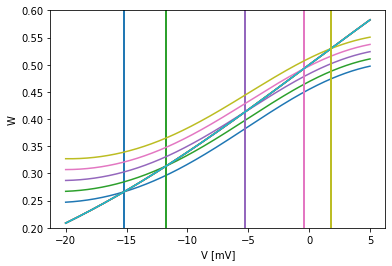

In [6]:
# Sweep current input and see how the nullclines shift
for I_ext in np.arange(30, 40, 2):
  plot_nc(V_sweep, I_ext)

# Vertical lines show where the nullclines intersect

In [7]:
# Can we get two intersection points?

In [8]:
# How do we determine whether the intersection is stable or unstable equlibrium?

# Further Reading
Stability analysis for reduced Hodgkin-Huxley models:

https://neurophysics.ucsd.edu/courses/physics_171/Reduced_Spike_Model.pdf

Bifurcation analysis of the AdEx neuron: 

http://www.scholarpedia.org/article/Adaptive_exponential_integrate-and-fire_model

Bard Ermentrout's INC chalk talk with SNICs:

https://youtu.be/XJYRTk5kRWE?t=2958 

